# LQ earnings vs LQ house price vs waiting List

In [74]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import r2_score


In [62]:
waiting = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=0, skiprows = 1)
price = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=1, skiprows = 1)
earnings = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=2, skiprows = 1)
ratio = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=3, skiprows = 1)
homeless = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=5, skiprows = 1)
householdPop = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=7, skiprows = 1)
socialLet = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=8, skiprows = 1)



homeless = homeless.drop(homeless.iloc[:,2:6], axis=1)


waiting = waiting.drop(waiting.iloc[:,2:17], axis=1)

merged = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=4)
merged = merged.drop(merged.iloc[:, 0:1], axis=1)


## Graphs

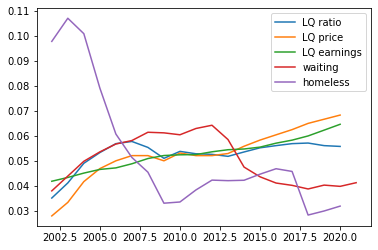

In [50]:
# plot normalised LQ price vs LQ earnings vs LQ ratio vs waiting List
priceCol = list(price.iloc[0])[2:]
price_norm = [float(i)/sum(priceCol) for i in priceCol]
waitingCol = list(waiting.iloc[0])[2:]
waiting_norm = [float(i)/sum(waitingCol) for i in waitingCol]
ratioCol = list(ratio.iloc[0])[2:]
ratio_norm = [float(i)/sum(ratioCol) for i in ratioCol]
earningsCol = list(earnings.iloc[0])[2:]
earnings_norm = [float(i)/sum(earningsCol) for i in earningsCol]
homelessCol = list(homeless.iloc[0])[2:]
homeless_norm = [float(i)/sum(homelessCol) for i in homelessCol]

plt.plot(list(ratio.columns)[2:], ratio_norm, label = "LQ ratio")
plt.plot(list(price.columns)[2:], price_norm, label = "LQ price")
plt.plot(list(earnings.columns)[2:], earnings_norm, label = "LQ earnings")
plt.plot(list(waiting.columns)[2:], waiting_norm, label = "waiting")
plt.plot(list(homeless.columns)[2:], homeless_norm, label = "homeless")

plt.legend()

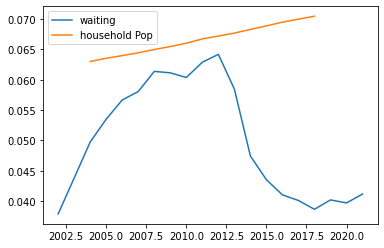

In [53]:
# plot normalised waiting List vs household population ;-;
waitingCol = list(waiting.iloc[0])[2:]
waiting_norm = [float(i)/sum(waitingCol) for i in waitingCol]
householdCol = list(householdPop.iloc[0])[2:]
household_norm = [float(i)/sum(householdCCol) for i in householdCCol]

plt.plot(list(waiting.columns)[2:], waiting_norm, label = "waiting")
plt.plot(list(householdPop.columns)[2:], household_norm, label = "household Pop")

plt.legend()

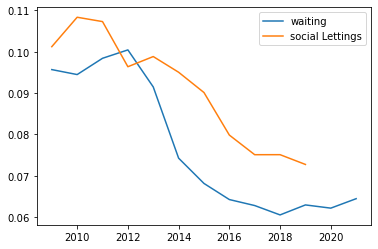

In [59]:
# plot normalised waiting List vs social Lettings
waitingCol = list(waiting.iloc[0])[9:]
waiting_norm = [float(i)/sum(waitingCol) for i in waitingCol]
socialLetCol = list(socialLet.iloc[0])[2:]
socialLet_norm = [float(i)/sum(socialLetCol) for i in socialLetCol]

plt.plot(list(waiting.columns)[9:], waiting_norm, label = "waiting")
plt.plot(list(socialLet.columns)[2:], socialLet_norm, label = "social Lettings")

plt.legend()

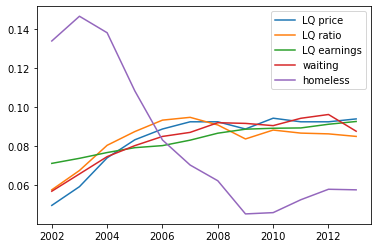

In [9]:
# plot normalised LQ price vs LQ earnings vs LQ ratio vs waiting List for correlated timescale only
endIndex = 14 # until 2013 inc.
priceCol = list(price.iloc[0])[2:endIndex]
price_norm = [float(i)/sum(priceCol) for i in priceCol]
waitingCol = list(waiting.iloc[0])[2:endIndex]
waiting_norm = [float(i)/sum(waitingCol) for i in waitingCol]
ratioCol = list(ratio.iloc[0])[2:endIndex]
ratio_norm = [float(i)/sum(ratioCol) for i in ratioCol]
earningsCol = list(earnings.iloc[0])[2:endIndex]
earnings_norm = [float(i)/sum(earningsCol) for i in earningsCol]

homelessCol = list(homeless.iloc[0])[2:endIndex]
homeless_norm = [float(i)/sum(homelessCol) for i in homelessCol]

plt.plot(list(price.columns)[2:endIndex], price_norm, label = "LQ price")
plt.plot(list(ratio.columns)[2:endIndex], ratio_norm, label = "LQ ratio")
plt.plot(list(earnings.columns)[2:endIndex], earnings_norm, label = "LQ earnings")
plt.plot(list(waiting.columns)[2:endIndex], waiting_norm, label = "waiting")
plt.plot(list(homeless.columns)[2:endIndex], homeless_norm, label = "homeless")


plt.legend()

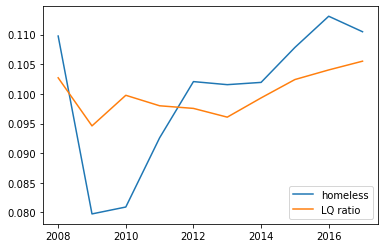

In [26]:
# 2008 to 2017
endIndex = 18
startIndex = 8
homelessCol = list(homeless.iloc[0])[startIndex:endIndex]
homeless_norm = [float(i)/sum(homelessCol) for i in homelessCol]
ratioCol = list(ratio.iloc[0])[startIndex:endIndex]
ratio_norm = [float(i)/sum(ratioCol) for i in ratioCol]

plt.plot(list(homeless.columns)[startIndex:endIndex], homeless_norm, label = "homeless")
plt.plot(list(ratio.columns)[startIndex:endIndex], ratio_norm, label = "LQ ratio")


plt.legend()

## Pearson's r value

In [91]:
# pearson's r computed using Pandas and Scipy between LQ price and waiting
overall_pearson_r = merged.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged.dropna()['waiting'], merged.dropna()['price'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

waitingList = list(waiting.iloc[0])[2:21]
priceList = list(price.iloc[0])[2:]
r2_score(waitingList, priceList)



Pandas computed Pearson r: -0.17580727993750206
Scipy computed Pearson r: -0.9438044677109567 and p-value: 4.075616420530805e-05


-24.388380126718943

In [35]:
# pearson's r computed using Pandas and Scipy between LQ earnings and waiting
overall_pearson_r = merged.corr().iloc[0,4]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged.dropna()['waiting'], merged.dropna()['earning'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


Pandas computed Pearson r: -0.29570092746995713
Scipy computed Pearson r: -0.29570092746995696 and p-value: 0.2190176134774588


In [29]:
# pearson's r computed using Pandas and Scipy between LQ homelessness and LQ ratio
overall_pearson_r = merged.corr().iloc[2,3]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged.dropna()['homeless'], merged.dropna()['ratio'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


Pandas computed Pearson r: -0.735535312503462
Scipy computed Pearson r: -0.7355353125034622 and p-value: 0.0003321133903518842


In [ ]:
# pearson's r computed using Pandas and Scipy between LQ ratio and waiting
overall_pearson_r = merged.corr().iloc[0,3]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged.dropna()['waiting'], merged.dropna()['ratio'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


In [99]:
# pearson's r computed using Pandas and Scipy for correlated timescale only between LQ price and waiting (up to 2013 inc.)
merged2 = merged.drop(merged.index[range(12,19)])
overall_pearson_r = merged2.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2.dropna()['waiting'], merged2.dropna()['price'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

waitingList = list(waiting.iloc[0])[2:14]
priceList = list(price.iloc[0])[2:14]
print(waitingList)
print(priceList)

r2_score(waitingList, priceList, multioutput='variance_weighted')


Pandas computed Pearson r: 0.9635238967572635
Scipy computed Pearson r: -0.2711536139468713 and p-value: 0.6590350551800237
[1093342, 1263931, 1434874, 1543337, 1634301, 1674421, 1769939, 1763140, 1740997, 1813559, 1850929, 1685814]
[67000, 80000, 100000, 112500, 119995, 125000, 125000, 120000, 127500, 125000, 125000, 127000]


-44.582397837723164

In [38]:
#  pearson's r computed using Pandas and Scipy for correlated timescale only between LQ earnings and waiting (up to 2013 inc.)
merged2 = merged.drop(merged.index[range(12,19)])
overall_pearson_r = merged2.corr().iloc[0,4]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2.dropna()['waiting'], merged2.dropna()['earning'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: 0.9165265813448494
Scipy computed Pearson r: 0.9165265813448494 and p-value: 2.7707215017080855e-05


In [39]:
# pearson's r computed using Pandas and Scipy for correlated timescale only between LQ ratio and waiting
merged2 = merged.drop(merged.index[range(12,19)])
overall_pearson_r = merged2.corr().iloc[0,3]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2.dropna()['waiting'], merged2.dropna()['ratio'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: 0.8490424828204247
Scipy computed Pearson r: 0.8490424828204246 and p-value: 0.00047644005691794764


In [70]:
# pearson's r computed using Pandas and Scipy for correlated timescale only between social lettings and waiting
merged2 = merged.drop(merged.index[range(0,5)])
merged2 = merged2.drop(merged2.index[range(13,15)])

overall_pearson_r = merged2.corr().iloc[0,7]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2.dropna()['waiting'], merged2.dropna()['social Lettings'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: 0.9140871463460684
Scipy computed Pearson r: 0.8956250462008852 and p-value: 0.00045698622574155624


In [40]:
# pearson's r computed using Pandas and Scipy for -ve correlated timescale only between LQ price and waiting (2014 inc. onwards)
merged2 = merged.drop(merged.index[range(0,12)])
overall_pearson_r = merged2.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2.dropna()['waiting'], merged2.dropna()['price'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: -0.8525510148921739
Scipy computed Pearson r: -0.852551014892174 and p-value: 0.014786368366468202


In [42]:
# pearson's r computed using Pandas and Scipy for -ve correlated timescale only between LQ earnings and waiting (2014 inc. onwards)
merged2 = merged.drop(merged.index[range(0,12)])
overall_pearson_r = merged2.corr().iloc[0,4]

print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2.dropna()['waiting'], merged2.dropna()['earning'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: -0.7297559465622604
Scipy computed Pearson r: -0.7297559465622601 and p-value: 0.06264546761091616


In [43]:
# pearson's r computed using Pandas and Scipy for -ve correlated timescale only between LQ ratio and waiting (2014 inc. onwards)
merged2 = merged.drop(merged.index[range(0,12)])
overall_pearson_r = merged2.corr().iloc[0,3]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2.dropna()['waiting'], merged2.dropna()['ratio'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: -0.9424709052269229
Scipy computed Pearson r: -0.9424709052269236 and p-value: 0.0014779340424424944


In [71]:
# pearson's r computed using Pandas and Scipy for -ve correlated timescale only between LQ ratio and homelessness 
# 2008 to 2017 inc. 
merged2 = merged.drop(merged.index[range(0,6)])
merged2 = merged2.drop(merged2.index[range(10,13)])

# display(merged2)
overall_pearson_r = merged2.corr().iloc[2,3]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2.dropna()['homeless'], merged2.dropna()['ratio'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: 0.7104449079065572
Scipy computed Pearson r: 0.6865497800795799 and p-value: 0.04109687869757421
